In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])
x = np.stack((x1, x2, x3))

In [3]:
w = np.zeros((len(x1), len(x1)))
for i in range(len(x1)):
    for j in range(len(x1)):
        for m in range(3):
            w[i, j] += x[m][i] * x[m][j]

In [4]:
def sign(x):
    return (1, -1)[x < 0]

def update_rule(a, w):
    x = np.zeros(len(a))
    for i in range(len(a)):
        for j in range(len(a)):
            x[i] += w[i, j] * a[j]
    x = [sign(a) for a in x]
    return x

In [5]:
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

## 3.1

In [6]:
find_attractor(x3d, w)

NameError: name 'find_attractor' is not defined

In [7]:
# Test convergens patters
def find_attractor(x, w):
    prev = x

    while True:
        curr = update_rule(prev, w)
        if np.array_equal(curr, prev):
            break
        prev = curr
    return prev


In [8]:
def generate_combination():
    x = np.array([1, 1, 1, 1, -1, -1, -1, -1])
    np.random.shuffle(x)
    return x

def array_in(small, large):
    for array in large:
        if np.array_equal(small, array):
            return True
    return False

In [9]:
# How many attractors are there?

pool = []

for i in range(400):
    x = generate_combination()
    
    pattern = find_attractor(x, w)
    if not array_in(pattern, pool):
        pool.append(pattern)

print("There are", len(pool), "attractors")
print(pool)

There are 9 attractors
[[1, 1, 1, 1, 1, -1, 1, 1], [-1, 1, 1, -1, -1, 1, -1, 1], [-1, -1, 1, -1, 1, 1, -1, 1], [1, 1, -1, 1, 1, -1, 1, -1], [1, 1, -1, 1, -1, 1, 1, -1], [-1, -1, 1, -1, 1, -1, -1, 1], array([ 1, -1, -1,  1,  1, -1,  1, -1]), array([-1,  1,  1, -1,  1, -1, -1,  1]), [1, 1, -1, 1, 1, 1, 1, -1]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


In [10]:
#More than half is wrong, what happens?
#Finds another attractor

pattern = [-1, -1, -1, 1, -1, 1, 1, 1]

find_attractor(pattern, w)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


[1, 1, -1, 1, -1, 1, 1, -1]

### 3.2

In [11]:
def store_patterns():
    data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
    return data
    #data = np.genfromtxt('pict.dat',
     #                dtype=None,
      #               delimiter=",")
    #patterns_pic = []
    
    #for i in range(1,12):
    #    img = np.zeros((32,32))
    #    for j in range(32):
    #        for k in range(32):
    #            
    #            img[j,k] = data[j*32+k]
    #    patterns_pic.append(img)
    #return patterns_pic
        


In [12]:
data = store_patterns()
#squeeze = imgs[0].ravel()


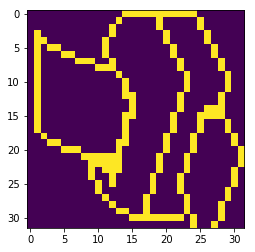

In [13]:
plt.imshow(data[0].reshape(32,32),interpolation="nearest")

In [14]:
def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    return w

In [15]:
w_pics = init_weights(data[:3,:])

In [16]:
attra = find_attractor(data[0], w_pics)
print(np.array_equal(attra, data[0]))

attra = find_attractor(data[1], w_pics)
print(np.array_equal(attra, data[1]))

attra = find_attractor(data[2], w_pics)
print(np.array_equal(attra, data[2]))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


True
True
True


In [17]:
check_deg_pat = find_attractor(data[9], w_pics)
print(np.array_equal(check_deg_pat, data[0]))

#Can complete

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


True


In [18]:
check_deg_pat = find_attractor(data[10], w_pics)
print(np.array_equal(check_deg_pat, data[2]))

#Can't complete

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


False


In [19]:
#What happens if we select units randomly?

def random_units(w, data, pattern):
    
    dim = len(w) 
    itera = 0
    gen_pattern = np.zeros(len(w))
    
    while True:
        ind = np.random.randint(0,dim)
        #pred_rand = np.dot(w[ind], pattern)
      
        pred=0
    
        for j in range(dim):
            pred += w[ind,j] * pattern[j]
        
        pred_sign = sign(pred) 

        gen_pattern[ind] = pred_sign
        
        
        itera += 1
            
        if itera%100 == 0:
            e = energy(w, gen_pattern)
            print("energy for iteration", itera, "is", e)
            plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
            stri = "Iteration " + str(itera)
            title = 'Random units, iteration: ' + str(itera)
            plt.title(title)
            #plt.savefig(stri)
            plt.show()
            
            
        for i in range(len(data)):
            if np.array_equal(gen_pattern, data[i]):
                print("pattern matched image:", i+1)
                print("found after iteration:", itera)
                e = energy(w, gen_pattern)
                print("energy for iteration", itera, "is", e)
                plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
                stri = "Iteration " + str(itera)
                title = 'Random units, iteration: ' + str(itera)
                plt.title(title)
                #plt.savefig(stri)
                plt.show()
                return
        
        

    
        
            
    
    

In [20]:
random_units(w_pics, data[:3,:], data[0,:])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


NameError: name 'energy' is not defined

In [22]:
def energy(w, x):
    dim = len(w)
    e = 0
    for i in range(dim):
        for j in range(dim):
            e+= w[i,j] * x[j]
            
    return -e
        
    

In [23]:
energy(w_pics, data[2])

-442.1458333319907

In [24]:
def iter_units(w, data, pattern):
    
    dim = len(w) 
    itera = 0
    gen_pattern = np.zeros(len(w))
    
      
    pred=0

    for i in range(dim):
        pred = np.dot(w[i],pattern.T)
        gen_pattern[i] = sign(pred)


    

    print("pattern matched image:", i+1)
    
    e = energy(w, gen_pattern)
    print("energy for iteration", itera, "is", e)
    plt.imshow(gen_pattern.reshape(32,32),interpolation="nearest")
    plt.show()
    return
        
        

In [25]:
def calc_energy(pattern, w):
    dim = pattern.size
    energy=0
    
    enrg = np.multiply(w, np.multiply.outer(pattern, pattern.T)).sum()
    
    """for i in range(dim):
        for j in range(dim):
            energy-= w[i][j]*pattern[i]*pattern[j]
    """        
    return -enrg

def recall2(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
            
        energyLevels.append(calc_energy(pattern,w))
        
        #print("Energy: ", calc_energy(pattern,w))

        if check_True(pattern):
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return pattern
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return False
        
        previousPattern=pattern
        if count ==50:
            return False

def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
            
        energyLevels.append(calc_energy(pattern,w))
        
        #print("Energy: ", calc_energy(pattern,w))

        if check_True(pattern):
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            break
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            break
        
        previousPattern=pattern
        if count ==50:
            break
    
    #plt.plot(range(len(energyLevels)),energyLevels)
    #plt.xlabel("Iterations")
    #plt.ylabel("Energy")
    #plt.savefig('w_rand')
    #plt.show()
    #print(energyLevels)
        
def check_True(predicted_pattern):
    solved = False
    for i in range(3):
        if np.array_equal(data[i],predicted_pattern):
            solved = True
    return solved
        
        

In [26]:
#Generate weights to normally distributed random numbers
dim = len(w_pics)
mu, sigma = 0, 1 # mean and standard deviation
w_rand = np.random.normal(mu, sigma, [dim, dim])
#w_rand = np.random.randn(dim, dim)

#iter_units(w, data[:3], data[0])

#Doesn't converge

In [27]:
def check_symmetric(a, tol=1e-8):
    
    return np.allclose(a, a.T, atol=tol)

In [28]:
#Generate symmetric weight matrix

#w_sym=0.5*(np.add(w,w.T))
w_sym = np.multiply(0.5,np.add(w_rand,w_rand.T))
#iter_units(w, data[0:3], data[0])

#Energy is higher, because...?

In [29]:
recall(data[0], w_rand)
#recall(data[0], w_sym)

# 3.4

In [30]:
def flip_pattern(x, perc):
    ind_vec = np.random.randint(0,len(x),round(len(x)*perc))
    
    for i in range(len(ind_vec)):
        x[i] = -x[i]
        
    plt.imshow(x.reshape(32,32),interpolation="nearest")
    plt.show()
        
    return x

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped

def flip2(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    plt.show()
    
    return flipped
    

In [31]:
y = flip(data[0], 0.1)
#plt.imshow(data[0].reshape(32,32),interpolation="nearest")
#plt.show()

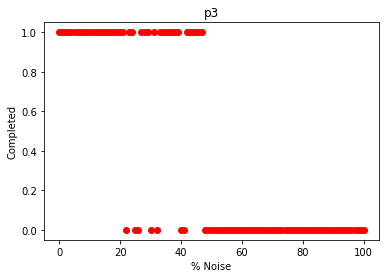

In [50]:
#Train a network with noise on pattern

res = []
ind = 2
for i in range(0,101):
    success = 0
    x = flip(data[ind],i/100)
    
    #plt.imshow(x.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    new_pattern = recall2(x, w_pics)
    
    if np.array_equal(data[ind], new_pattern):
        success = 1
    res.append(success)    

plt.plot(range(0,101),res, 'ro')
plt.xlabel('% Noise')
plt.ylabel('Completed')
plt.title('p3')
plt.savefig('noisep3')
plt.show()




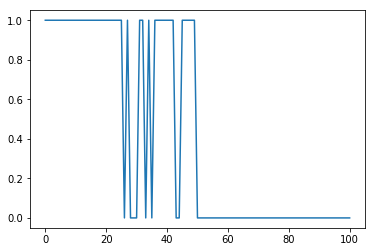

In [61]:
#perc_list = [0.1, 0.2, 0.3, 0. 0.5, 0.7, 0.85]
bool_list = []
start_ind = 2
for i in range(0, 101):
    
    x = flip(data[start_ind],i/100)
    ind = recall(x, w_pics)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

In [57]:
def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        solved, ind = check_True(pattern)
        if solved:
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return ind
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            return -1
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(3):
        if np.array_equal(data[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved, i